In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, adjusted_rand_score, fowlkes_mallows_score, homogeneity_score, completeness_score, v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
from google.colab import files
_=files.upload()

Saving 2liver.csv to 2liver.csv


#Часть 1

Создание набора данных

In [ ]:
def make_data(n, seed):
    np.random.seed(seed)

    shift_matrix = np.array([[3, 3],
                             [6, 9],
                             [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

df=make_data(90, 2678)

Получение train и test наборов данных. 25% от датасеты выделяется на `train`

In [ ]:
X = df['x']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=144)

Стандартизация данных используя `StandartScaler`.  Стандартизация преобразует данные таким образом, что их математическое ожидание равно 0, а стандартное отклонение равно 1

In [ ]:
scaler = StandardScaler() # создание объекта класса Scaler

# преобразование данных с помощью transform
train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 2))
test_scaled = scaler.transform(X_test.values.reshape(-1, 2))

Обучение модели кластеризации используя метод Kmeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state = 0, n_init='auto')

k_means = kmeans.fit_predict(train_scaled)


Визуализация кластеров

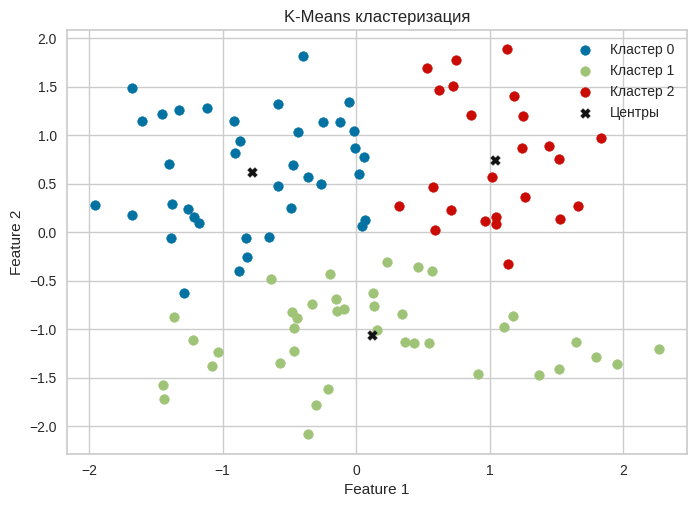

In [ ]:
# Получение центров кластеров
cluster_centers = kmeans.cluster_centers_

# Разделение объекта на кластеры
cluster_0 = train_scaled[k_means == 0]
cluster_1 = train_scaled[k_means == 1]
cluster_2 = train_scaled[k_means == 2]

plt.scatter(cluster_0[:, 0], cluster_0[:, 1], c='b', label='Кластер 0')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='g', label='Кластер 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='r', label='Кластер 2')

# Выделение центров кластеров
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='X', label='Центры')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-Means кластеризация')

plt.show()

Исходя из полученного графика можно сделать вывод, что 3 - оптимальное количество кластеров для полученного из функции датасета.

Используя данные test было выполнено предсказание и его визуализация

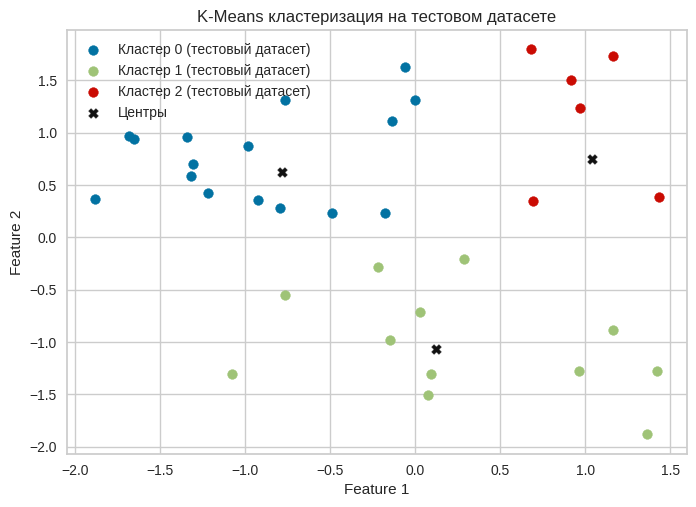

In [ ]:
test_kmeans = kmeans.predict(test_scaled)
cluster_centers = kmeans.cluster_centers_

test_cluster_0 = test_scaled[test_kmeans == 0]
test_cluster_1 = test_scaled[test_kmeans == 1]
test_cluster_2 = test_scaled[test_kmeans == 2]

plt.scatter(test_cluster_0[:, 0], test_cluster_0[:, 1], c='b', label='Кластер 0 (тестовый датасет)')
plt.scatter(test_cluster_1[:, 0], test_cluster_1[:, 1], c='g', label='Кластер 1 (тестовый датасет)')
plt.scatter(test_cluster_2[:, 0], test_cluster_2[:, 1], c='r', label='Кластер 2 (тестовый датасет)')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='X', label='Центры')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('K-Means кластеризация на тестовом датасете')

plt.show()

In [ ]:
# Вычисление коэффициента силуэта на тестовых данных
silhouette = silhouette_score(test_scaled, test_kmeans)

print(f"Коэффициента силуэта на тестовых данных: {silhouette}")

Коэффициента силуэта на тестовых данных: 0.45088496766983077


Исходя из графика и вычисленного коэффициента силуэта можно прийти к выводам:
*   Модель относительно неплохо, но не идеально прводит кластеризацию.
*   Коэффициент указывает на умеренное разделение объектов внутри и между кластеров






Построение графиков и расчет коэффициента силуэта при `n_clusters=2` и `n_clusters=4`

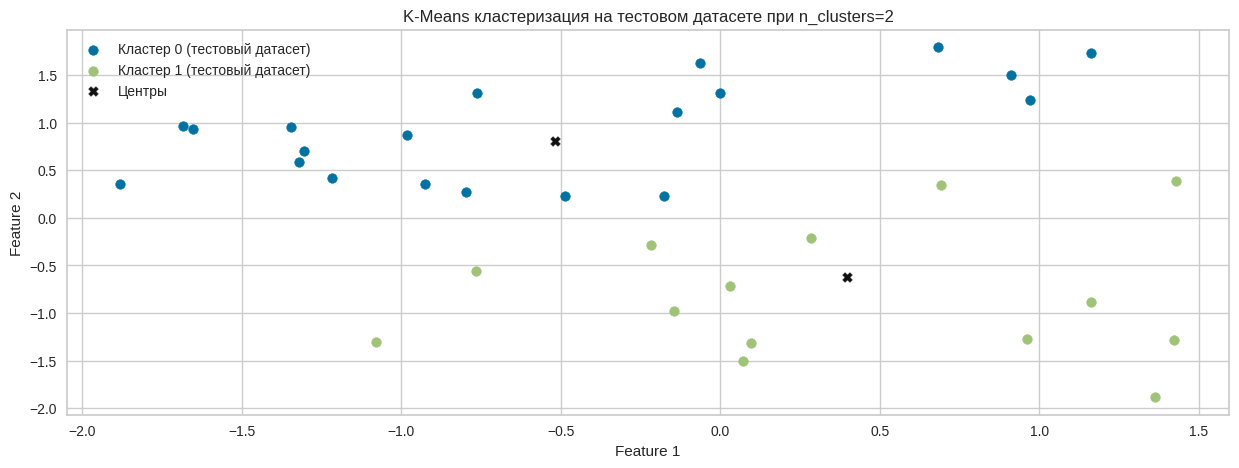

Коэффициента силуэта на тестовых данных: 0.40839448026509384 при n_clusters=2


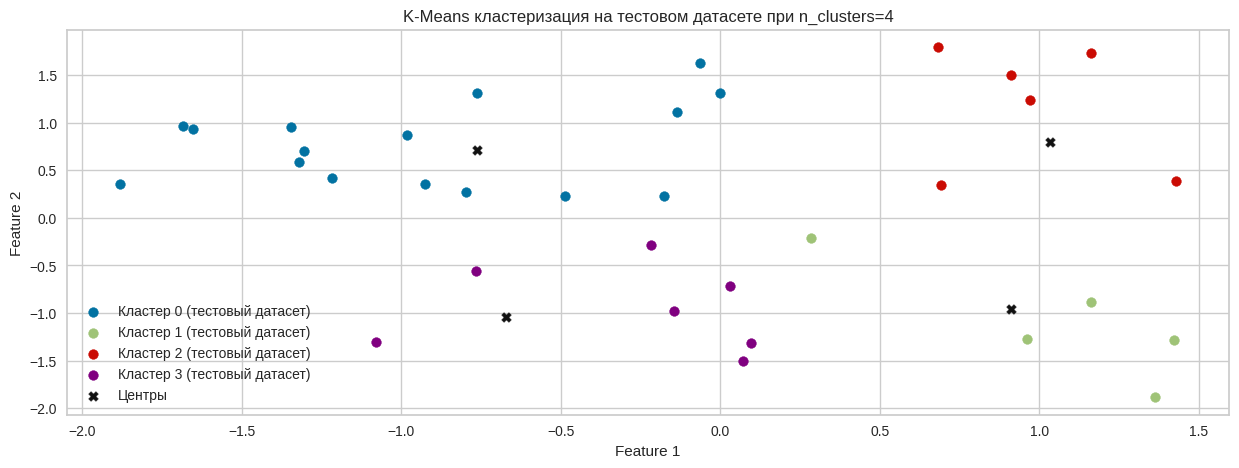

Коэффициента силуэта на тестовых данных: 0.4080655638315746 при n_clusters=4


In [ ]:
for i in [2, 4]:

  kmeans = KMeans(n_clusters=i, random_state = 0, n_init='auto')

  k_means = kmeans.fit_predict(train_scaled)

  cluster_centers = kmeans.cluster_centers_

  test_kmeans = kmeans.predict(test_scaled)

  test_cluster_0 = test_scaled[test_kmeans == 0]
  test_cluster_1 = test_scaled[test_kmeans == 1]
  if i!=2:
    test_cluster_2 = test_scaled[test_kmeans == 2]
    test_cluster_3 = test_scaled[test_kmeans == 3]

  plt.figure(figsize=(15, 5))
  plt.scatter(test_cluster_0[:, 0], test_cluster_0[:, 1], c='b', label='Кластер 0 (тестовый датасет)')
  plt.scatter(test_cluster_1[:, 0], test_cluster_1[:, 1], c='g', label='Кластер 1 (тестовый датасет)')
  if i!=2:
    plt.scatter(test_cluster_2[:, 0], test_cluster_2[:, 1], c='r', label='Кластер 2 (тестовый датасет)')
    plt.scatter(test_cluster_3[:, 0], test_cluster_3[:, 1], c='purple', label='Кластер 3 (тестовый датасет)')

  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='X', label='Центры')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.title(f'K-Means кластеризация на тестовом датасете при n_clusters={i}')

  plt.show()

  # Вычисление коэффициента силуэта на тестовых данных
  silhouette = silhouette_score(test_scaled, test_kmeans)

  print(f"Коэффициента силуэта на тестовых данных: {silhouette} при n_clusters={i}")

Исходя из графиков и вычисленных коэффициентов силуэта можно прийти к выводам:
*   Оптимальное количество кластеров для датасета - 3. При увеличении (как и при уменьшении) количества кастеров кластеризация не показывает оптимальные результаты



Построение графика по методу локтя

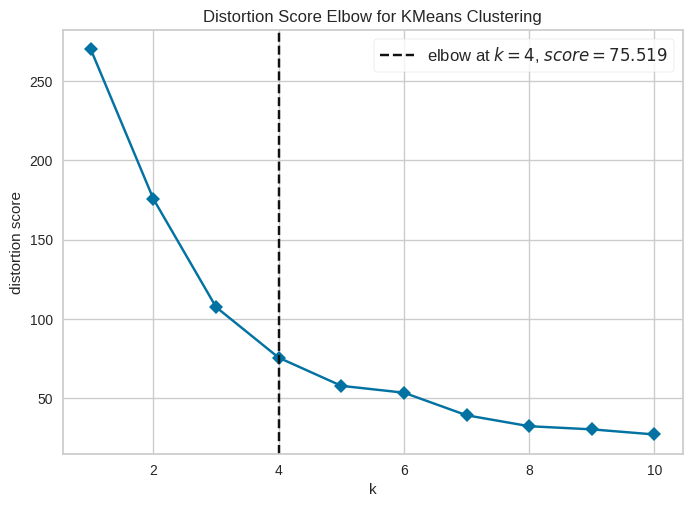

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
X_scaled = scaler.fit_transform(X.values.reshape(-1, 2))
visualizer = KElbowVisualizer(kmeans, k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

Из полученного графика можно сделать вывод, что оптимальное количество кластеров для модели, учитывая датасет = 4.

# Часть 2

Датасет содержит информацию:
1. Возраст пациента
2. Пол пациента
3. Общий билирубин
4. Прямой билирубин
5. Щелочная фосфатаза
6. Аламиноаминотрансфераза
7. Аспартатаминотрансфераза
8. Всего белков
9. Альбумин
10. Соотношение альбуминов и глобулинов
11. Целевая переменная: пациент с заболеванием печени или без заболевания

Чтение CSV файла и вывод первых 10 строк датасета

In [ ]:
df=pd.read_csv('2liver.csv')
df.head(10)

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290.0,53,58,6.8,3.4,1.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


Переименование столбцов TotalBilirubin и Dataset123 в Total_Bilirubin и Is_Liver_Disease

In [ ]:
df = df.rename(columns={'TotalBilirubin' : 'Total_Bilirubin', 'Dataset123' : 'Is_Liver_Disease'})

NameError: name 'df' is not defined

Удаление всех NaN значений и явных дубликатов

In [ ]:
df = df.dropna()
df = df.drop_duplicates()

Поиск неявных дубликатов в столбцах `Gender`, `Is_Livery_Disease`, `Aspartate_Aminotransferase`. Поиск производится в данных столабцах так как неявные дубликаты не могут присутствовать в числовых столбцах.

In [ ]:
display(df['Gender'].unique())
display(df['Is_Liver_Disease'].unique())
display(df['Aspartate_Aminotransferase'].unique())

array(['Female', 'Male', 'Mal'], dtype=object)

array(['1', '2', 'yes'], dtype=object)

array(['18', '100', '68', '20', '59', '14', '12', '11', '19', '58', '56',
       '30', '41', '53', '441', '23', '245', '28', '34', '66', '55', '45',
       '731', '850', '21', '111', '44', '57', '80', '36', '77', '73',
       '50', '110', '47', '576', '15', '178', '27', '960', '406', '150',
       '61', '54', '24', '16', '43', '97', '86', '88', '95', '26', '17',
       '397', '29', '22', '127', '79', '142', '152', '31', '3a4', '350',
       '794', '400', '202', '630', '950', '161', '405', '92', '39', '10',
       '116', '98', '285', '64', '149', '2946', '1600', '1050', '275',
       '113', '84', '25', '40', '83', '65', '4929', '90', '140', '139',
       '87', '38', '42', '233', '138', '82', '35', '32', '187', '62',
       '74', '67', '37', '602', '63', '99', '103', '145', '247', '114',
       '104', '51', '60', '1500', '180', '148', '46', '13', '85', '231',
       '156', '89', '298', '48', '130', '75', '500', '105', '250', '232',
       '33', '143', '176', '70', '52', '91', '236', '108

Исправление неявных дубликатов, а именно замена:


*  Mal в столбце Gender на Male
*  yes в столбце Is_Liver_Disease на 1



In [ ]:
df['Gender'] = df['Gender'].replace('Mal', 'Male')
df['Is_Liver_Disease'] = df['Is_Liver_Disease'].replace('yes', '1')
display(df['Gender'].unique())
display(df['Is_Liver_Disease'].unique())

array(['Female', 'Male'], dtype=object)

array(['1', '2'], dtype=object)

Конвертация типа Is_Liver_Disease и Aspartate_Aminotransferase в int, удаление NaN - значений  

In [ ]:
df['Is_Liver_Disease'] = df['Is_Liver_Disease'].astype('int')
df['Aspartate_Aminotransferase'] = pd.to_numeric(df['Aspartate_Aminotransferase'], errors='coerce')
df = df.dropna()
df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].astype('int')
df.info()

NameError: name 'df' is not defined

Целевая переменная находится в столбце Is_Livery_Disease и определяет есть ли у человека болезнь печени или нет

Построение матрицы диаграмм рассеяния

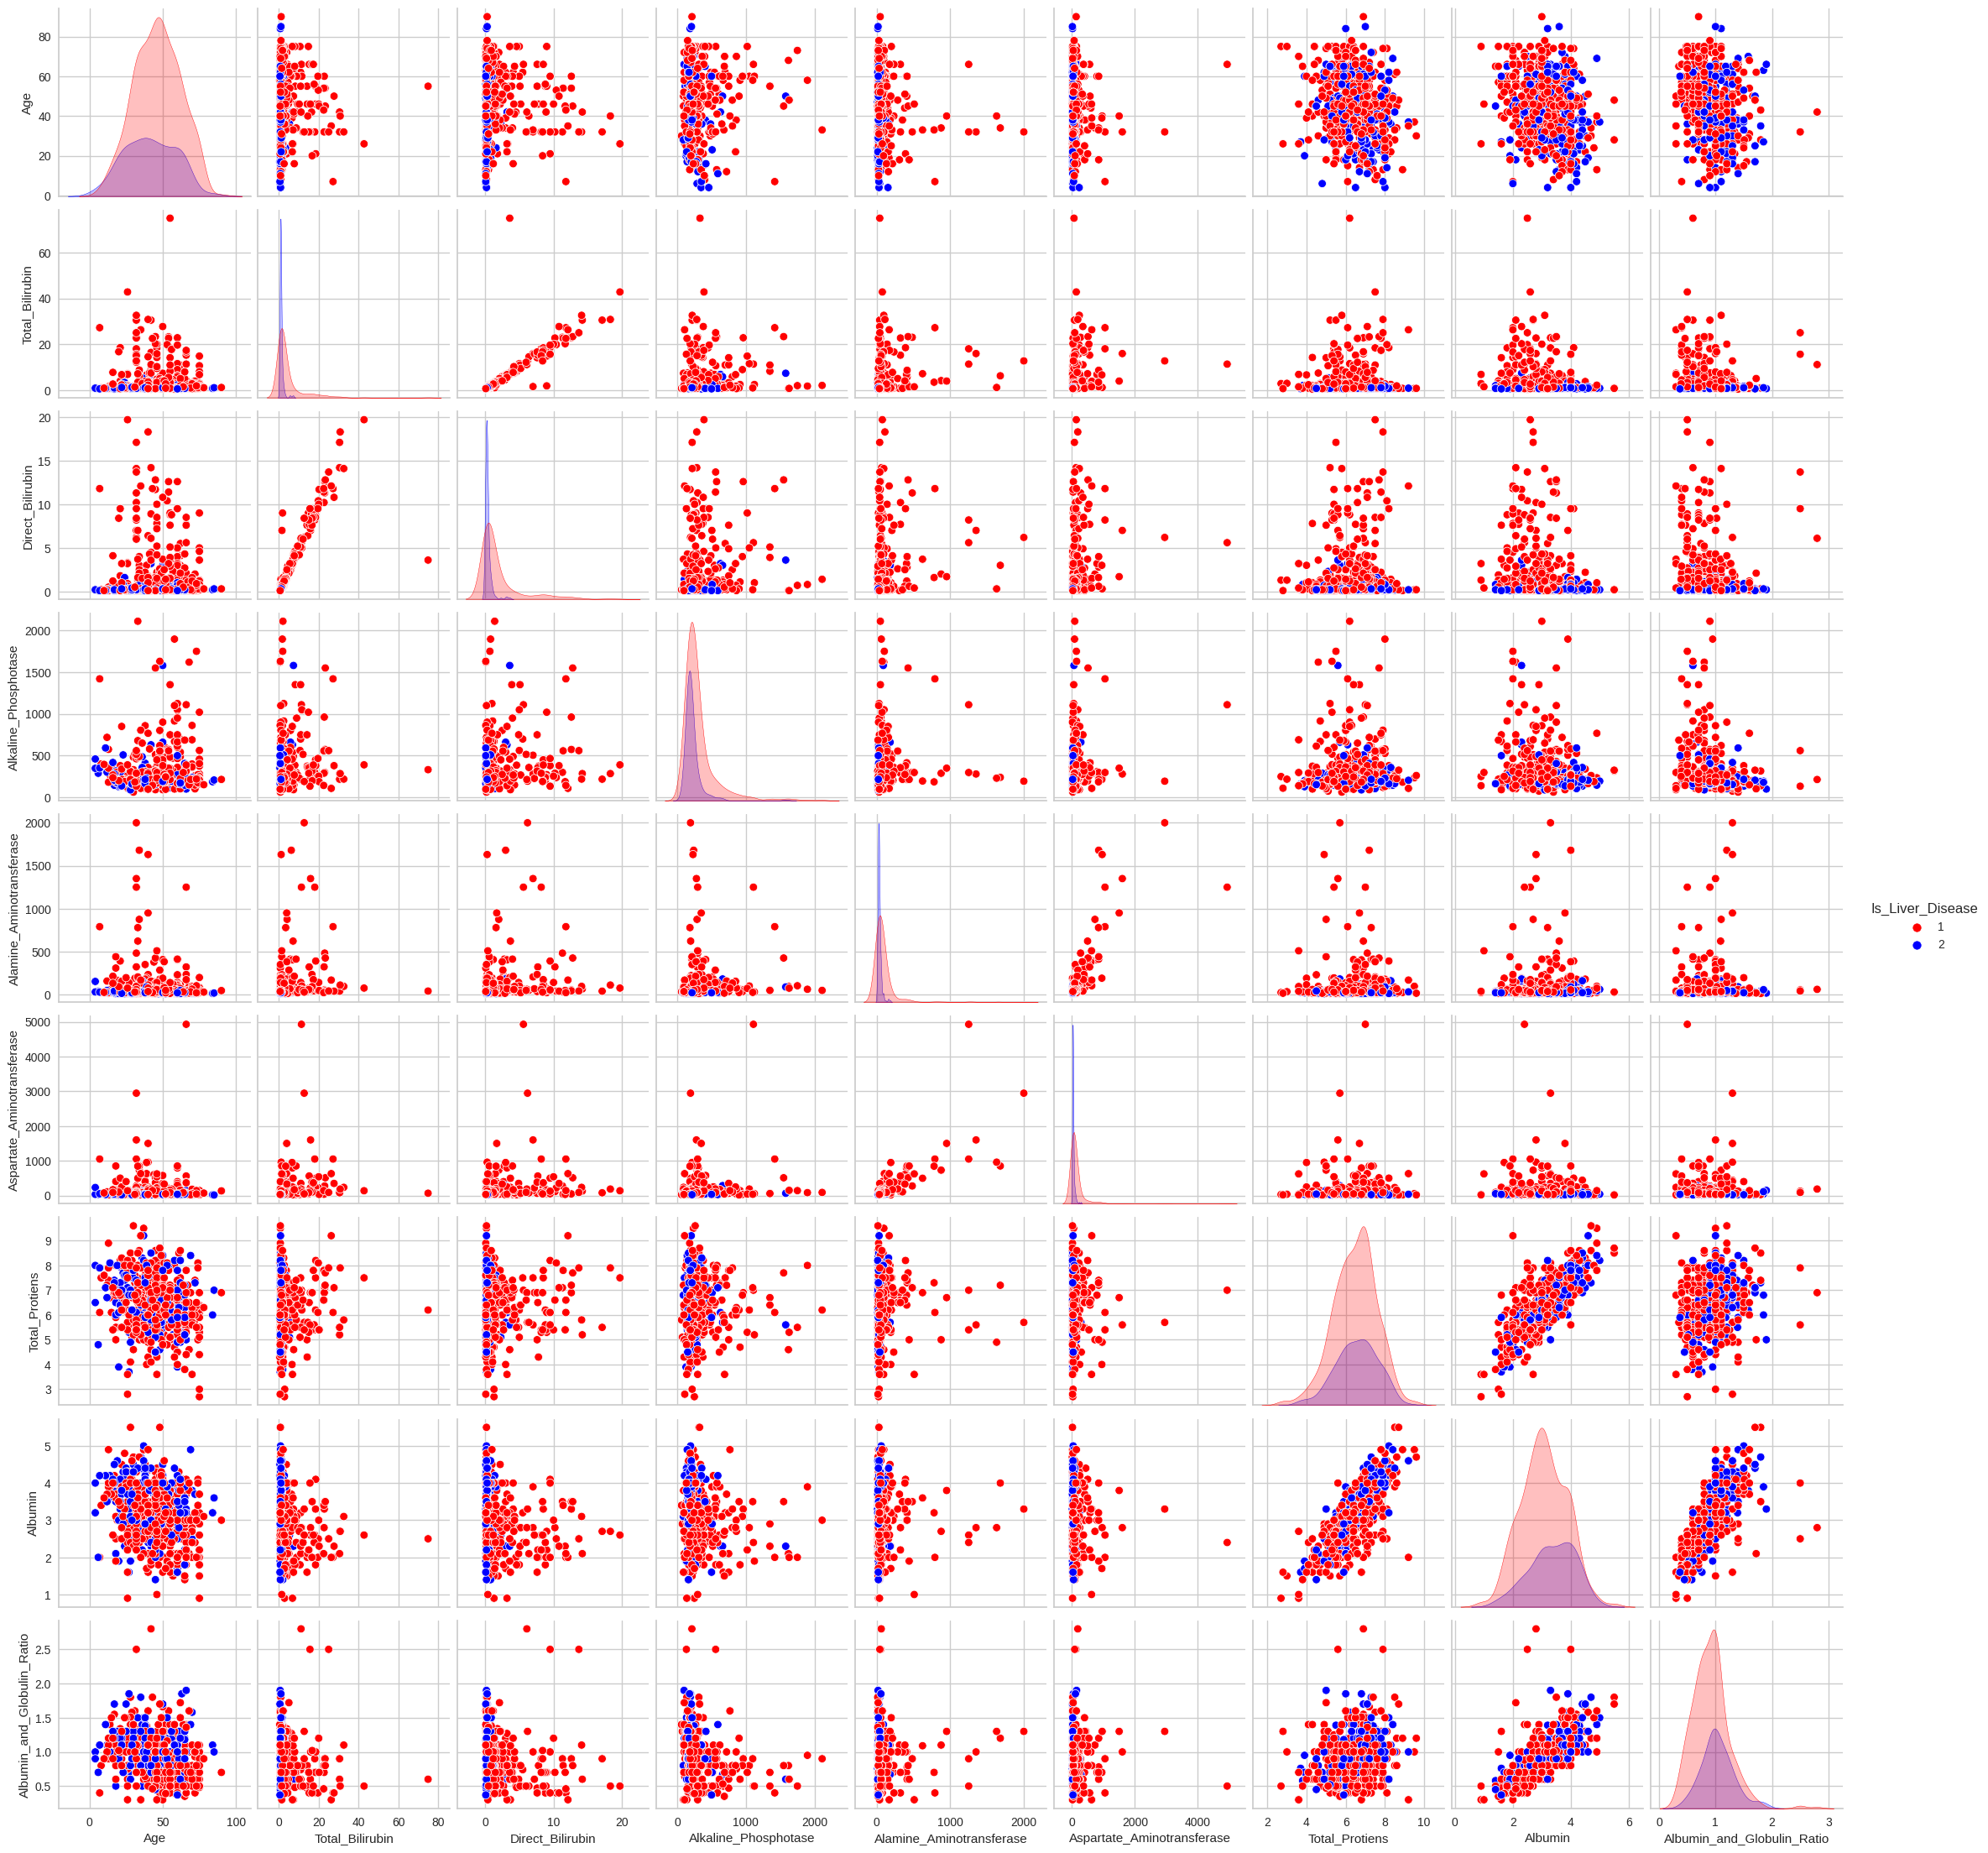

In [ ]:
sns.pairplot(df, hue='Is_Liver_Disease', palette={1: 'red', 2: 'blue'})
plt.show()

Из полученных диаграмм можно сделать вывод о том, что:
* Пациентов без заболевания печени гораздо больше болеющих пациентов
* При уровне билирубина выше 5 пациент имеет заболевание печени
* У болеющих людей значение билирубина превышает 15
* При значении аламиноаминотрансферазы выше 500 пациент имеет заболевание печени
* При значении аспартатаминотрансферазы выше 500 пациент имеет заболевание печени
* При значении белка меньше 4 пациент имеет заболевание печени

Порядковое кодирование нечисловых столбцов используя `OrdinalEncoder()`. В исходном датасете категориальные признаки находятся в столбце `Gender`

In [ ]:
encoder = OrdinalEncoder()

# Список столбцов с категориальными признаками
categorical_columns = ['Gender']

# Применение кодирования
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

Разделение датасета на целевую переменную и признаки

In [ ]:
X = df.drop(columns=['Is_Liver_Disease'])
y = df['Is_Liver_Disease']

Стандартизация признаков используя `StandartScaler`

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)

Определение оптимального количества кластеров используя метод локтя

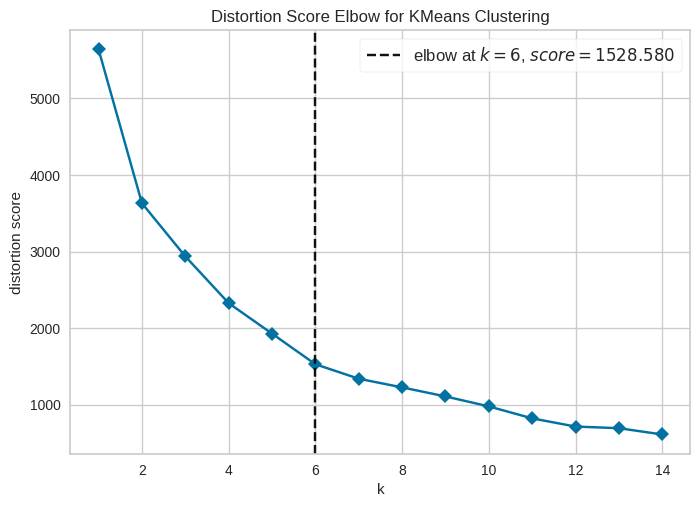

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(1,15), timings=False)
visualizer.fit(X_train_scaled.reshape(-1, 2))
visualizer.show()

Оптимальное количество кластеров - 6

Кластеризация используя метод K-Means

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init='auto')

kmeans.fit(X_train_scaled)

train_cluster_labels = kmeans.labels_

Вычисление средних показателей значений для кластеров

In [ ]:
X['Cluster_Labels'] = train_cluster_labels

# Группировка данных по меткам кластеров
cluster_groups = X.groupby('Cluster_Labels')

# Вычисление средних показателей
cluster_means = cluster_groups.mean()

cluster_means

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Cluster_Labels,,,,,,,,,,
0,36.756098,1.000000,1.446951,0.632317,221.804878,57.189024,68.939024,7.143293,3.850610,1.190061
1,55.847826,0.971014,2.763043,1.313043,413.043478,67.869565,95.963768,6.452174,2.942029,0.827029
2,38.111111,1.000000,8.511111,3.955556,353.000000,1307.111111,1712.222222,6.088889,3.066667,1.033333
3,43.973684,0.815789,22.539474,10.447368,426.894737,131.473684,217.157895,6.547368,2.578947,0.703947
4,41.696429,0.000000,1.071429,0.365179,233.901786,41.937500,50.089286,6.941964,3.511607,1.018482
5,47.912621,0.854369,2.073786,0.893204,247.135922,49.417476,80.233010,5.033010,2.127184,0.742233


Из полученного датафрейма с кластерами и средними значениями признаков можно сделать следующие выводы:

1. Кластер 0:
   - Средний возраст: около 37 лет.
   - Пол: преимущественно мужской (Gender близок к 1).
   - Умеренные средние значения Total_Bilirubin и Direct_Bilirubin.
   - Средние значения Alkaline_Phosphotase, Alamine_Aminotransferase и Aspartate_Aminotransferase.
   - Высокие средние значения Total_Protiens и Albumin.
   - Среднее значение Albumin_and_Globulin_Ratio около 1.19.

2. Кластер 1:
   - Средний возраст: около 56 лет.
   - Пол: преимущественно женский (Gender близок к 1).
   - Высокие средние значения Total_Bilirubin и Direct_Bilirubin.
   - Высокие средние значения Alkaline_Phosphotase, Alamine_Aminotransferase и Aspartate_Aminotransferase.
   - Ниже средние значения Total_Protiens и Albumin.
   - Среднее значение Albumin_and_Globulin_Ratio около 0.83.

3. Кластер 2:
   - Средний возраст: около 38 лет.
   - Пол: преимущественно мужской (Gender близок к 1).
   - Очень высокие средние значения Total_Bilirubin и Direct_Bilirubin.
   - Очень высокие средние значения Alkaline_Phosphotase, Alamine_Aminotransferase и Aspartate_Aminotransferase.
   - Низкие средние значения Total_Protiens и Albumin.
   - Низкое среднее значение Albumin_and_Globulin_Ratio.

4. Кластер 3:
   - Средний возраст: около 44 лет.
   - Пол: преимущественно мужской (Gender около 0.82).
   - Высокие средние значения Total_Bilirubin и Direct_Bilirubin.
   - Высокие средние значения Alkaline_Phosphotase, Alamine_Aminotransferase и Aspartate_Aminotransferase.
   - Умеренные средние значения Total_Protiens и Albumin.
   - Среднее значение Albumin_and_Globulin_Ratio около 0.70.

5. Кластер 4:
   - Средний возраст: около 42 лет.
   - Пол: преимущественно женский (Gender близок к 0).
   - Низкие средние значения Total_Bilirubin и Direct_Bilirubin.
   - Средние значения Alkaline_Phosphotase, Alamine_Aminotransferase и Aspartate_Aminotransferase.
   - Высокие средние значения Total_Protiens и Albumin.
   - Среднее значение Albumin_and_Globulin_Ratio около 1.02.

6. Кластер 5:
   - Средний возраст: около 48 лет.
   - Пол: преимущественно мужской (Gender около 0.85).
   - Умеренные средние значения Total_Bilirubin и Direct_Bilirubin.
   - Умеренные средние значения Alkaline_Phosphotase, Alamine_Aminotransferase и Aspartate_Aminotransferase.
   - Низкие средние значения Total_Protiens и Albumin.
   - Среднее значение Albumin_and_Globulin_Ratio около 0.74.

Вычисление метрик качества

In [ ]:
silhouette = silhouette_score(X_train_scaled, train_cluster_labels)
ami = adjusted_mutual_info_score(y, train_cluster_labels)
ari = adjusted_rand_score(y, train_cluster_labels)
fmi = fowlkes_mallows_score(y, train_cluster_labels)
homogeneity = homogeneity_score(y, train_cluster_labels)
completeness = completeness_score(y, train_cluster_labels)
v_measure = v_measure_score(y, train_cluster_labels)

print("Качество кластеризации по метрике Силуэта:", silhouette)
print("Качество кластеризации по метрике AMI:", ami)
print("Качество кластеризации по метрике ARI:", ari)
print("Качество кластеризации по метрике FMI:", fmi)
print("Качество кластеризации по метрике однородности:", homogeneity)
print("Качество кластеризации по метрике полноты:", completeness)
print("Качество кластеризации по метрике гармоническое среднее полноты и однородности:", completeness)

Качество кластеризации по метрике Силуэта: 0.20977603952334245
Качество кластеризации по метрике AMI: 0.04089821571063792
Качество кластеризации по метрике ARI: 5.728713572920422e-05
Качество кластеризации по метрике FMI: 0.3612351369177471
Качество кластеризации по метрике однородности: 0.0818991844519262
Качество кластеризации по метрике полноты: 0.030941609451722113
Качество кластеризации по метрике гармоническое среднее полноты и однородности: 0.030941609451722113


Исходя из вычисленных метрик качества кластеризации, можно сделать следующие выводы:

1. Силуэт (Silhouette): Значение силуэта равно 0.21, что указывает на то, что объекты внутри кластеров более похожи друг на друга, чем на объекты из других кластеров. Большее значение силуэта обычно указывает на лучшее разделение кластеров.

2. AMI (Adjusted Mutual Information): Значение AMI равно 0.04, что означает низкую корреляцию между кластерами и истинными метками.

3. ARI (Adjusted Rand Index): Значение ARI очень близко к нулю (5.73e-05), что также указывает на низкое сходство между кластерами и истинными метками. ARI измеряет сходство между разбиениями, и значение близкое к 0 означает, что разбиения практически независимы.

4. FMI (Fowlkes-Mallows Index): Значение FMI равно 0.36, что свидетельствует о некотором сходстве между кластерами и истинными метками, но не очень высоком. FMI оценивает точность кластеризации с учетом пар объектов.

5. Однородность (Homogeneity): Значение однородности равно 0.08, что указывает на низкую однородность кластеров, то есть объекты внутри одного кластера могут быть разнообразными.

6. Полнота (Completeness): Значение полноты равно 0.03, что указывает на низкую полноту, то есть многие объекты с одной истинной меткой могут оказаться в разных кластерах.

7. Гармоническое среднее полноты и однородности: Значение гармонического среднего полноты и однородности также равно 0.03, что подтверждает низкое сходство между кластерами и истинными метками.

Общий вывод: Метрики качества указывают на то, что полученные кластеры не очень хорошо соответствуют оригинальным классам, и кластеризация может потребовать дополнительного улучшения параметров.

Построение дендограммы

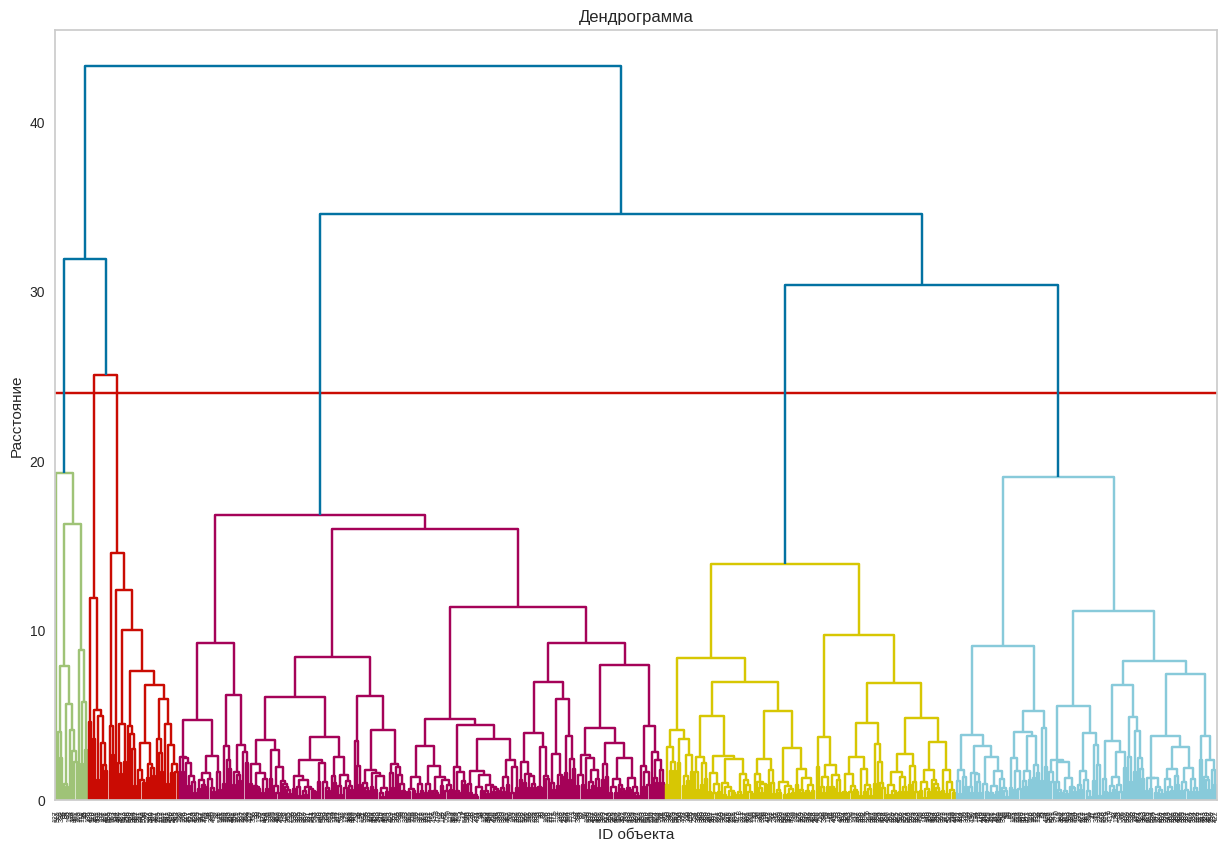

In [ ]:

linked = linkage(X_train_scaled, method = 'ward')# таблица «связок» между объектами

# Визуализация дендрограммы
plt.figure(figsize=(15, 10))
plt.axhline(y=24, color = 'r')
dendrogram(linked, orientation='top')
plt.grid(False)
plt.ylabel('Расстояние')
plt.xlabel('ID объекта')
plt.title('Дендрограмма')
plt.show()


На основе полученной дендограммы можно сделать вывод, что оптимальное количество кластеров - 5.

Кластеризация иерархическим агломеративным методом

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=6)

agg_clusters = agg_clustering.fit(X_train_scaled)

train_cluster_labels = agg_clusters.labels_

Вычисление метрик кластеризации

In [ ]:
silhouette = silhouette_score(X_train_scaled, train_cluster_labels)
ami = adjusted_mutual_info_score(y, train_cluster_labels)
ari = adjusted_rand_score(y, train_cluster_labels)
fmi = fowlkes_mallows_score(y, train_cluster_labels)
homogeneity = homogeneity_score(y, train_cluster_labels)
completeness = completeness_score(y, train_cluster_labels)
v_measure = v_measure_score(y, train_cluster_labels)

print("Качество кластеризации по метрике Силуэта:", silhouette)
print("Качество кластеризации по метрике AMI:", ami)
print("Качество кластеризации по метрике ARI:", ari)
print("Качество кластеризации по метрике FMI:", fmi)
print("Качество кластеризации по метрике однородности:", homogeneity)
print("Качество кластеризации по метрике полноты:", completeness)
print("Качество кластеризации по метрике гармоническое среднее полноты и однородности:", completeness)

Качество кластеризации по метрике Силуэта: 0.22712636052160676
Качество кластеризации по метрике AMI: 0.051397065934177644
Качество кластеризации по метрике ARI: 0.021856083750406034
Качество кластеризации по метрике FMI: 0.42954171379902123
Качество кластеризации по метрике однородности: 0.09266064645784443
Качество кластеризации по метрике полноты: 0.03990342459805237
Качество кластеризации по метрике гармоническое среднее полноты и однородности: 0.03990342459805237


Сравнив метрики, можно заметить, что иерархический агломеративный метод показывает некоторое улучшение во многих метриках по сравнению с методом K-Means. В частности, у агломеративного метода выше среднее значение Силуэта, FMI и однородности.

Однако, несмотря на это, значения метрик в обоих методах довольно низкие, что может указывать на сложность задачи кластеризации или неоптимальное количество кластеров.

Для данного датасета целесообразнее использовать иерархический агломеративный метод

#Дополнительное задание

Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до 10). Построить график - по оси х - кол-во кластеров, по у - значение метрики (отразить все 4 метрики на одном графике разным цветом).

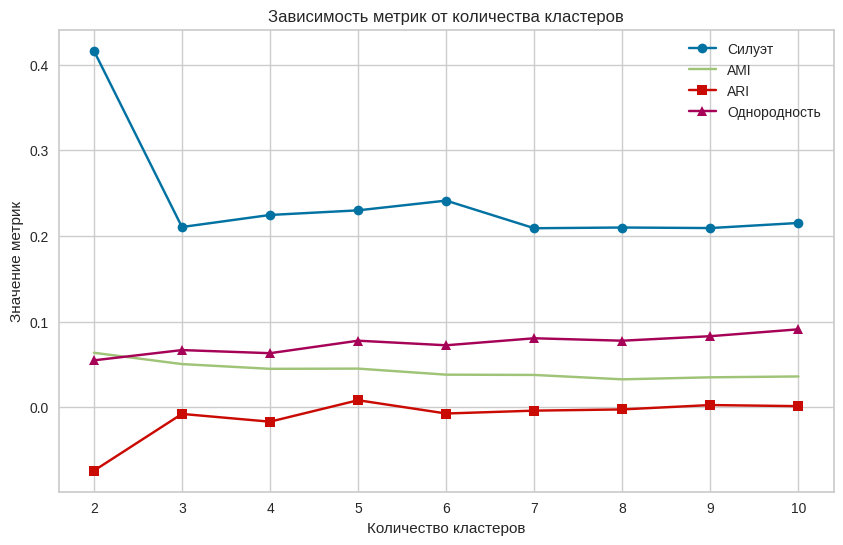

In [ ]:
# Список для хранения значений метрик для разного количества кластеров
silhouette_scores = []
ami_scores = []
ari_scores = []
homogeneity_scores = []

# Определение диапазона количества кластеров от 2 до 10
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    # Создание и обучение модели K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=144, n_init=10)
    kmeans.fit(X_train_scaled)

    # Прогнозирование кластеров для обучающих данных
    cluster_labels = kmeans.predict(X_train_scaled)

    # Вычисление метрик
    silhouette = silhouette_score(X_train_scaled, cluster_labels)
    ami = adjusted_mutual_info_score(y, cluster_labels)
    ari = adjusted_rand_score(y, cluster_labels)
    homogeneity = homogeneity_score(y, cluster_labels)

    # Добавление значений метрик в соответствующие списки
    silhouette_scores.append(silhouette)
    ami_scores.append(ami)
    ari_scores.append(ari)
    homogeneity_scores.append(homogeneity)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, label='Силуэт', marker='o')
plt.plot(n_clusters_range, ami_scores, label='AMI', marker='x')
plt.plot(n_clusters_range, ari_scores, label='ARI', marker='s')
plt.plot(n_clusters_range, homogeneity_scores, label='Однородность', marker='^')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение метрик')
plt.legend()
plt.title('Зависимость метрик от количества кластеров')
plt.show()

На основе полученного графика можно сделать следующие выводы:


*   Значение метрики Силуэта самое высокое при 2 кластерах, что означает что объекты кластерах хорошо разделены и далеки друг от друга, в то время как объекты внутри кластеров близки друг к другу. При увеличении количества кластеров до 3 происходит резкое падение метрики, а затем она стабилизируется, достигая локального максимума при 6 кластерах.
*  Значение метрики ARI для любого количества кластеров кроме 5 меньше либо равна 0, что означает что хотя объекты внутри кластеров близки друг к другу, метки этих кластеров сильно отличаются от истинных меток кластеров данных.
* Значение метрики AMI находится в районе 0 для любого количества кластеров, что значит что при увеличении количества кластеров полученная кластеры почти не содержат информации о фактических классах. При этом, при увеличении количества кластеров метрика только ухудшается.
* Значение метрики однородности также близко к 0 не зависимо от количества кластеров, однако, метрика однородности достагает своего максимума при 10 кластерах.


* Оптимальное количество кластеров - 5


#Вывод

В ходе данной лабораторной работы были изучены различные алгоритмы и методы кластеризации, а именно:


*   Кластеризация методом k-средних
*   Кластеризация иерархическим агломеративным методом

Датасет представляет собой набор данных о заболевании печени. В данных представлен возраст, пол пациента. Также представлены различные анализы пациента и вывод о том болен пациент или нет.
*	В ходе данной работы был проведен анализ и кластеризация датасета с информацией о пациентах с заболеваниями печени
*	Была проведена предобработка данных
*	Была выполнена кластеризация объектов иерархическим агломеративным методом
*	Была 	выполнена кластеризация методом К-средних

На основе полученных результатов было установлено, что для данного датасета целесообразнее использовать иерархический агломеративный метод.

Также, было установлено, что данный датасет плохо поддается кластеризации в целом.
